<p> <center> <h1>Optimization and Local Search Algorithms</h1> </center> </p>

<br><br>

<p><h4> <b>Problem 1: Eight Queens Puzzle</b> </h4></p>

Use the random walk, hill climbing, and simulated annealing algorithms to find a solution to the 8 queens problem, and compare the performance of these algorithms. Which algorithm allows you to find a solution to the problem?

In [87]:
import random
import math

# Function to generate a random board configuration
def generateRandomBoard(size):
    return [random.randint(0, size-1) for _ in range(size)]

# Function to calculate the number of attacking pairs of queens
def calculateAttacks(board):
    size = len(board)
    attacks = 0
    for i in range(size):
        for j in range(i+1, size):
            if board[i] == board[j] or abs(i-j) == abs(board[i]-board[j]):
                attacks += 1
    return attacks

# Random walk algorithm
def randomWalk(size, max_steps):
    current_board = generateRandomBoard(size)
    current_attacks = calculateAttacks(current_board)
    steps = 0

    while current_attacks > 0 and steps < max_steps:
        neighbor = generateRandomBoard(size)
        neighbor_attacks = calculateAttacks(neighbor)
        if neighbor_attacks < current_attacks:
            current_board, current_attacks = neighbor, neighbor_attacks
        steps += 1
    
    return current_board, current_attacks, steps

# Hill climbing algorithm
def hillClimbing(size, max_steps):
    current_board = generateRandomBoard(size)
    current_attacks = calculateAttacks(current_board)
    steps = 0

    while current_attacks > 0 and steps < max_steps:
        best_neighbor, best_attacks = current_board[:], current_attacks
                    
        for i in range(size):
            for j in range(size):
                if j != current_board[i]:
                    neighbor = current_board[:]
                    neighbor[i] = j
                    
                    neighbor_attacks = calculateAttacks(neighbor)
                    if neighbor_attacks < best_attacks:
                        best_neighbor, best_attacks = neighbor, neighbor_attacks
        
        if best_attacks < current_attacks:
            current_board, current_attacks = best_neighbor, best_attacks
        else:
            break
        
        steps += 1

    return current_board, current_attacks, steps

# Simulated annealing algorithm
def simulatedAnnealing(size, max_steps):
    current_board = generateRandomBoard(size)
    current_attacks = calculateAttacks(current_board)
    temperature, cooling_rate = 1.0, 0.999
    steps = 0

    while current_attacks > 0 and steps < max_steps:
        neighbor = generateRandomBoard(size)
        neighbor_attacks = calculateAttacks(neighbor)

        if neighbor_attacks < current_attacks or random.random() < math.exp(-(neighbor_attacks - current_attacks) / temperature):
            current_board, current_attacks = neighbor, neighbor_attacks
        
        temperature *= cooling_rate
        steps += 1
    
    return current_board, current_attacks, steps

# Function to print the board
def printBoard(board):
    for row in board:
        line = ""
        for col in range(len(board)):
            if col == row:
                line += "Q "
            else:
                line += ". "
        print(line)


# Function to compare performances
def comparePerformance(algorithm, size, max_steps, num_iterations):
    total_attacks = 0
    total_steps = 0
    for _ in range(num_iterations):
        board, attacks, steps = algorithm(size, max_steps)
        total_attacks += attacks
        #total_steps += max_steps if attacks > 0 else total_steps
        total_steps += steps
    avg_attacks = total_attacks / num_iterations
    avg_steps = total_steps / num_iterations
    return avg_attacks, avg_steps

# Main function to compare performances of algorithms
def main():
    size = 8
    max_steps = 10000
    num_iterations = 100
    
    print(f"Total puzzles of {size}x{size} solved per algorithm: {num_iterations}")
    print(f"Maximum iterations of each algorithm for best optimal solution: {max_steps}\n")

    print("\tRandom Walk:")
    avg_attacks_rw, avg_steps_rw = comparePerformance(randomWalk, size, max_steps, num_iterations)
    print("Average Attacks:", avg_attacks_rw)
    print("Average Steps:", avg_steps_rw)
    
    print("\n\tHill Climbing:")
    avg_attacks_hc, avg_steps_hc = comparePerformance(hillClimbing, size, max_steps, num_iterations)
    print("Average Attacks:", avg_attacks_hc)
    print("Average Steps:", avg_steps_hc)
    
    print("\n\tSimulated Annealing:")
    avg_attacks_sa, avg_steps_sa = comparePerformance(simulatedAnnealing, size, max_steps, num_iterations)
    print("Average Attacks:", avg_attacks_sa)
    print("Average Steps:", avg_steps_sa)

if __name__ == "__main__":
    main()


Total puzzles of 8x8 solved per algorithm: 100
Maximum iterations of each algorithm for best optimal solution: 10000

	Random Walk:
Average Attacks: 1.2
Average Steps: 9763.03

	Hill Climbing:
Average Attacks: 1.3
Average Steps: 3.14

	Simulated Annealing:
Average Attacks: 1.05
Average Steps: 9756.15


<br>

The algorithm that allows us to find an optimal solution to the 8 queens problem is **Simulated Annealing**.

The differences between the three algorithms are:

1. **Random Walk**:
   - This algorithm chooses random moves in each iteration without considering whether or not the move improves the current solution. Therefore, it is less likely to find optimal solutions.
   - It is useful for exploring the solution space in a simple way, but it is not as effective for finding optimal solutions in complex problems.

2. **Hill Climbing**:
   - This algorithm always moves towards a neighboring solution that improves the current solution, that is, it always looks for a "better" solution in each iteration.
   - However, due to this local improvement strategy, the algorithm may get trapped in local optima and not find global optimal solutions in complex problems.

3. **Simulated Annealing**:
   - This algorithm is similar to Random Walk, but introduces a probability of accepting worse solutions in certain situations, which allows escaping local optima and exploring different parts of the solution space.
   - Simulated Annealing simulates the physical process of cooling a molten material, where at high temperatures the particles have more freedom to move (accept worse solutions), and as the temperature decreases, the particles become more rigid (less likely to accept solutions worse).

Now, as for the results of the simulations:

1. On average, Simulated Annealing has the lowest average number of attacks per solution found, indicating that it finds solutions closer to the optimal one.
2. Although Hill Climbing has a very low number of steps, the average number of attacks is higher than Simulated Annealing, suggesting that it is more likely to be trapped in local optima.
   
Based on these results, we can conclude that the Simulated Annealing algorithm is the most effective in finding solutions to the 8 queens problem compared to Random Walk and Hill Climbing.

<br><br>

<p><h4> <b>Problem 2: Optimal Route</b> </h4></p>

The following figure shows a collection of points on the plane, which we want to join with straight lines in such a way that a closed figure is formed. Each point can only be connected to two other points.

<div>
<img src="optimal_route_problem.png" width="600"/>
</div>

Use greedy search and simulated annealing algorithms to find how the points would be connected, so that the sum of the lengths of the lines connecting the figure is as short as possible. Which algorithm gives you the best results?

		Greedy Search:
Total Distance: 984.434
Connections:


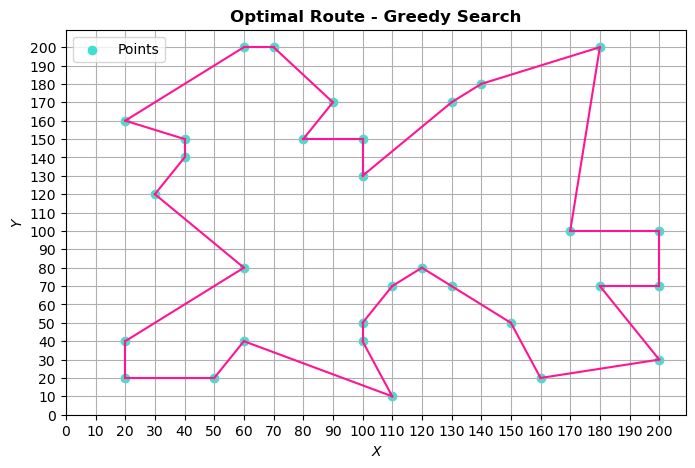


		Simulated Annealing:
Total Distance: 1265.424
Connections:


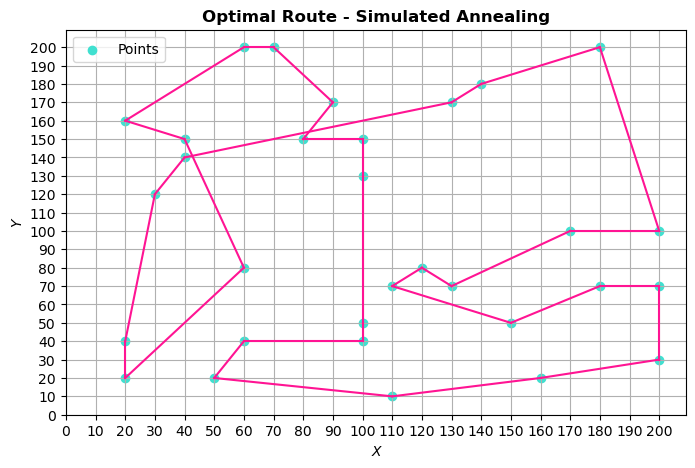

In [3]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

# Define the points
points = [(160,20), (170,100), (180,70), (180,200), (200,30), (200,70), (200,100), (20,20), (20,40), 
          (20,160), (30,120), (40,140), (40,150), (50,20), (60,40), (60,80), (60,200), (70,200), (80,150), 
          (90,170), (100,40), (100,50), (100,130), (100,150), (110,10), (110,70), (120,80), (130,70), 
          (130,170), (140,180), (150,50)]

# Function to calculate Euclidean distance between two points
def distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Function to calculate the total distance of connections
def calculateTotalDistance(points):
    total_distance = 0
    for i in range(len(points)):
        total_distance += distance(points[i], points[(i+1) % len(points)])
    return total_distance

# Greedy Search Algorithm
def greedySearch(points):
    # Initialize an empty list to store the connections
    connections = []
    remaining_points = points[:]

    # Choose the starting point (the first point in the list)
    current_point = remaining_points.pop(0)
    
    # Iterate until all points are connected
    while remaining_points:
        # Find the nearest point to the current point
        nearest_point = min(remaining_points, key=lambda point: distance(current_point, point))
        # Connect the current point to the nearest point
        connections.append((current_point, nearest_point))
        # Update the current point
        current_point = remaining_points.pop(remaining_points.index(nearest_point))
    
    # Connect the last point to the starting point to form a closed figure
    connections.append((current_point, points[0]))

    return connections

# Simulated Annealing Algorithm
def simulatedAnnealing(points, max_iterations, temperature, cooling_rate):
    # Define initial state
    current_state = points
    random.shuffle(current_state)
    current_cost = calculateTotalDistance(current_state)

    # Define variables to store the best solution found so far
    best_state = current_state
    best_cost = current_cost

    # Main loop for simulated annealing
    for __ in range(max_iterations):
        # Generate a new neighbor state by swapping two random points
        neighbor_state = current_state[:]
        index1, index2 = random.sample(range(len(neighbor_state)), 2)
        neighbor_state[index1], neighbor_state[index2] = neighbor_state[index2], neighbor_state[index1]

        # Calculate the cost of the neighbor state
        neighbor_cost = calculateTotalDistance(neighbor_state)

        # Determine whether to accept the neighbor state
        if neighbor_cost < current_cost or random.random() < math.exp((current_cost - neighbor_cost) / temperature):
            current_state = neighbor_state
            current_cost = neighbor_cost

            # Update the best solution if necessary
            if current_cost < best_cost:
                best_state = current_state
                best_cost = current_cost

        # Decrease temperature
        temperature *= cooling_rate

    # Convert the best solution to connections
    connections = [(best_state[i], best_state[(i+1) % len(best_state)]) for i in range(len(best_state))]
    return connections

# Function to plot the points and connections
def plotConnections(points, connections, title):
    # Create a larger figure
    plt.figure(figsize=(8, 5))
    
    # Extract x and y coordinates of points
    x_coords = [point[0] for point in points]
    y_coords = [point[1] for point in points]

    # Plot points
    plt.scatter(x_coords, y_coords, color='turquoise', label='Points')

    # Plot connections
    for connection in connections:
        plt.plot([connection[0][0], connection[1][0]], [connection[0][1], connection[1][1]], color='deeppink')

    # Set ticks on x and y axes to range from 0 to 200 in increments of 10
    plt.xticks(np.arange(0, 210, 10))
    plt.yticks(np.arange(0, 210, 10))
    
    # Plot settings
    plt.title(f"Optimal Route - {title}", fontweight='bold')
    plt.xlabel('X', fontstyle='italic')
    plt.ylabel('Y', fontstyle='italic')
    #plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.grid(True)
    plt.show()


# Main function
def main():
    # Solve using Greedy Search
    print("\t\tGreedy Search:")
    greedy_connections = greedySearch(points)
    greedy_total_distance = calculateTotalDistance([connection[0] for connection in greedy_connections])
    print("Total Distance:", np.round(greedy_total_distance,3))
    print("Connections:")
    
    # Plot Greedy Search results
    plotConnections(points, greedy_connections, 'Greedy Search')

    print()

    # Solve using Simulated Annealing
    print("\t\tSimulated Annealing:")
    max_iterations = 10000
    initial_temperature = 1000
    cooling_rate = 0.999
    simulated_annealing_connections = simulatedAnnealing(points, max_iterations, initial_temperature, cooling_rate)
    simulated_annealing_total_distance = calculateTotalDistance([connection[0] for connection in simulated_annealing_connections])
    print("Total Distance:", np.round(simulated_annealing_total_distance,3))
    print("Connections:")
    
    # Plot Simulated Annealing results
    plotConnections(points, simulated_annealing_connections, 'Simulated Annealing')


if __name__ == "__main__":
    main()


The algorithm that obtains the best results is Greedy Search. This is evident in the results of multiple simulations, where Greedy Search produces a lower total distance compared to Simulated Annealing on all occasions.

It is important to note that, although in an optimal path problem, such as minimum spanning trees, the order of the points or the starting point generally does not matter, it seems that the Greedy Search algorithm presents an inconsistency in this aspect . After analyzing different permutations of the same entry points, it is observed that the order of the points can significantly affect the total route distance. In some cases, the total distance can increase to almost 1100 units, which in certain scenarios can be greater than that of the Simulated Annealing Algorithm. However, on average, Greedy Search is still better in terms of results.

Greedy Search has an average total distance of 984.434 units across all simulations, while Simulated Annealing has a higher average total distance, around 1250 units. It is important to note that these distances are typically associated with a cost, and the objective of the problem is to minimize this cost.

Therefore, we can conclude that the Greedy Search algorithm is more effective compared to Simulated Annealing for this specific problem of finding the optimal path between points in the plane.